In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_ARG = df[(df['job_country'] == 'Argentina')]

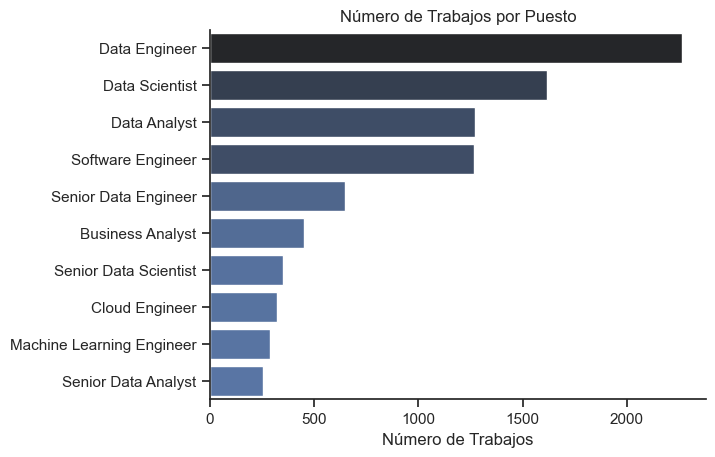

In [4]:
df_plot = df_ARG['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Número de Trabajos por Puesto')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

In [46]:
## Filter for Data Analyst roles in Argentina

df_DA_ARG = df[(df['job_country'] == 'Argentina') & (df['job_title_short'] == 'Data Analyst')]

df_DA_ARG['job_location'] = df_DA_ARG['job_location'].replace('Argentina', 'No Especifica')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].replace('Anywhere', 'Trabajo Remoto')

C:\Users\gonza\AppData\Local\Temp\ipykernel_16768\3893720055.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_ARG['job_location'] = df_DA_ARG['job_location'].replace('Argentina', 'No Especifica')
C:\Users\gonza\AppData\Local\Temp\ipykernel_16768\3893720055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_ARG['job_location'] = df_DA_ARG['job_location'].replace('Anywhere', 'Trabajo Remoto')


In [47]:
df_plot = df_DA_ARG['job_location'].value_counts().head(10).to_frame()

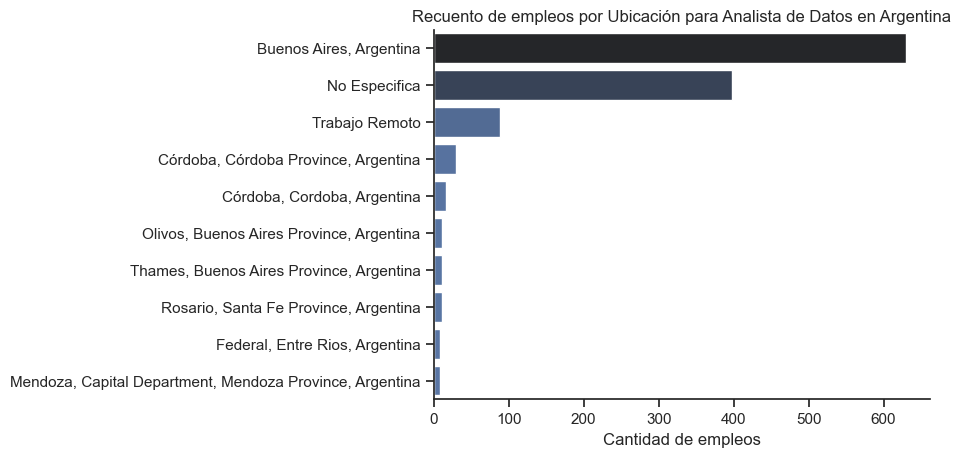

In [48]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Recuento de empleos por Ubicación para Analista de Datos en Argentina')
plt.xlabel('Cantidad de empleos')
plt.ylabel('')
plt.show()

In [31]:
df_DA_ARG['company_name'].unique()

array(['Job Duck', 'Vintti', 'IT Scout', 'Tata Consultancy Services',
       'Universidad de Palermo', 'Randstad Argentina',
       'Aprende Institute', 'Borderless Software', 'JPMorgan Chase & Co.',
       'KPMG Argentina', 'PwC Argentina', 'KAMCHATKA', 'QUID - INNTECI',
       'WeITConnect', 'Frost & Sullivan', 'Web:',
       'Cervecería y Maltería Quilmes', 'CONA', 'DW Consulware de Perú',
       'Seeds', 'HumandBrand', 'Banco Galicia', 'GlobalLogic',
       'ECD Digital + Strategy', 'FlyOnData', 'Dhumall Sdn Bhd', 'Prex',
       'Wunderman Thompson Argentina', 'Stefanini Group', 'Flexiti',
       'HSBC', 'Capgemini Engineering', 'The AES Corporation',
       'Avancargo', 'Dialpad', 'Criterium', 'IHS Markit', 'Mercado Libre',
       'Publicis Groupe', 'Emprego', 'Bumeran Selecta',
       'JPMorgan Chase Bank, N.A.', 'FYG Consultoría', 'CIDER S.A.',
       'LC Consultora', 'BBVA', 'Givaudan', 'Accenture',
       'Cohen Aliados Financieros', 'IQVIA',
       'Médicos Sin Fronteras Lati

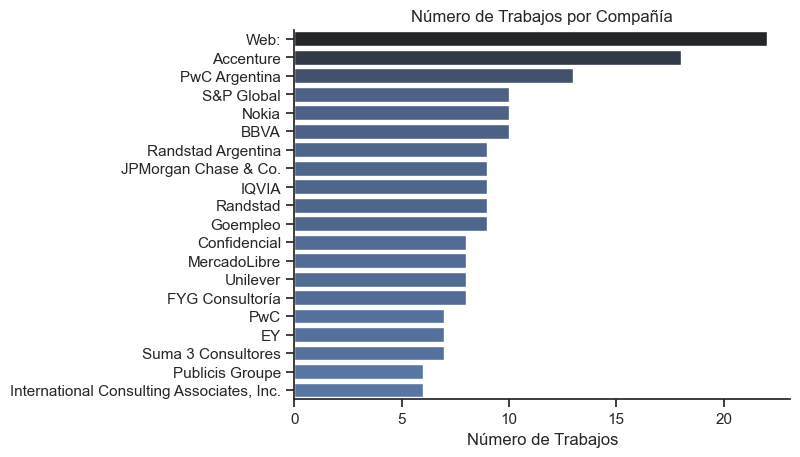

In [49]:
df_plot = df_DA_ARG['company_name'].value_counts().to_frame()[1:].head(20) ## Extraemos el primer elemento de la lista mediante slicing, dado que el primer resultado es una plataforma de reclutamiento.
df_plot

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Número de Trabajos por Compañía')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

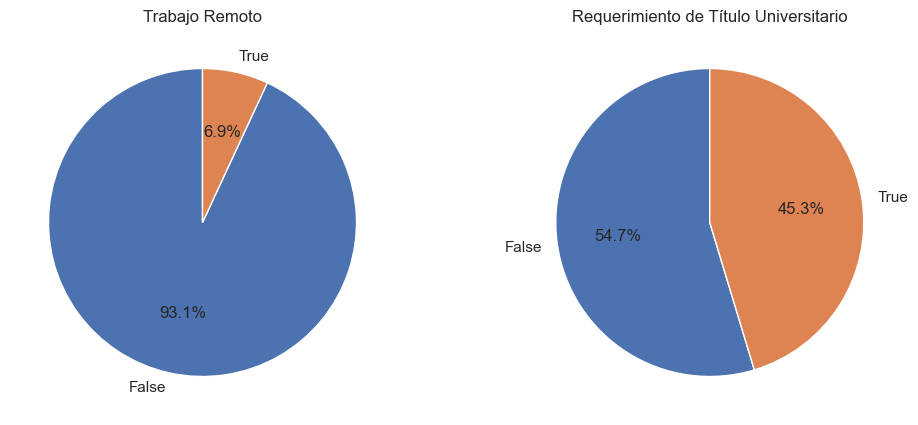

In [58]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Trabajo Remoto',
    'job_no_degree_mention': 'Requerimiento de Título Universitario'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_ARG[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

In [54]:
df_DA_ARG

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2023,Data Analyst,Data Analyst,Trabajo Remoto,via LinkedIn,Full-time,True,Argentina,2023-03-03 13:38:00,False,False,Argentina,None,NaN,NaN,Job Duck,"[sql, python, javascript, excel, sheets, power...","{'analyst_tools': ['excel', 'sheets', 'power b..."
3459,Data Analyst,Data Analyst (USD & Remote),Trabajo Remoto,via LinkedIn,Full-time,True,Argentina,2023-09-21 13:37:40,False,False,Argentina,None,NaN,NaN,Vintti,"[sql, excel, sheets, flow]","{'analyst_tools': ['excel', 'sheets'], 'other'..."
4407,Data Analyst,Marketing Data Analyst,No Especifica,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-03 13:11:37,True,False,Argentina,None,NaN,NaN,IT Scout,None,None
5187,Data Analyst,Data Analyst,No Especifica,via LinkedIn,Full-time,False,Argentina,2023-04-28 13:18:43,True,False,Argentina,None,NaN,NaN,Tata Consultancy Services,"[sql, nosql, neo4j, gcp, azure, bigquery]","{'cloud': ['gcp', 'azure', 'bigquery'], 'datab..."
6663,Data Analyst,Data Analyst,"Buenos Aires, Argentina",via BeBee,Full-time,False,Argentina,2023-12-22 13:14:46,False,False,Argentina,None,NaN,NaN,Universidad de Palermo,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785193,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:44,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, r]","{'programming': ['sql', 'r']}"
785306,Data Analyst,Data Analyst Tfe,No Especifica,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:36,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, python, r, vba, azure, power bi, git]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
785319,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:42,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, python, r, aws, azure, hadoop, git]","{'cloud': ['aws', 'azure'], 'libraries': ['had..."
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"[python, r, sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."
